In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import numpy.fft as fft

In [2]:
captured_path = '../laser_shots/tridents/'
raw_path = '../DMD_inputs/tridents/'

In [3]:
captured_1d, captured_2d = [], []

# read 1d images
for i in range(5):
    img = cv.imread(captured_path + '1d_' + str(i + 1) + '.png', cv.IMREAD_GRAYSCALE)
    captured_1d.append(img)

# read 2d images
for i in range(5):
    img = cv.imread(captured_path + '2d_' + str(i + 1) + '.png', cv.IMREAD_GRAYSCALE)
    captured_2d.append(img)

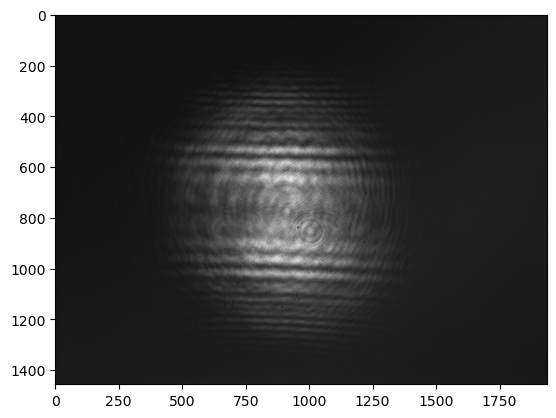

In [4]:
plt.imshow(captured_1d[1], cmap='gray')

In [5]:
raw_1d, raw_2d = [], []

# read 1d images
for i in range(5):
    img = cv.imread(raw_path + 'trident_1d_' + str(i + 1) + '.bmp', cv.IMREAD_GRAYSCALE)
    raw_1d.append(img)

# read 2d images
for i in range(5):
    img = cv.imread(raw_path + 'trident_2d_' + str(i + 1) + '.bmp', cv.IMREAD_GRAYSCALE)
    raw_2d.append(img)

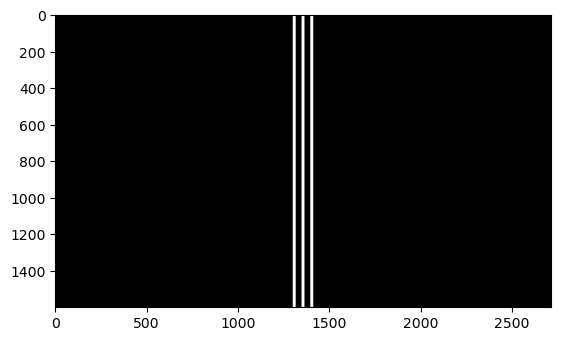

In [6]:
plt.imshow(raw_1d[1], cmap='gray')

In [7]:
def draw_ring(inner: int, outer: int, a2: float = 1, img_shape: tuple = (1600, 2716)) -> np.ndarray:
    ring = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    # white large circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), outer, a2, -1)
    # black small circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), inner, 0, -1)
    return ring

def trident_2d(ws: list[int], a1: float = 1, a2: float = 1, shape: tuple[int, int] = (1600, 2716)) -> list[np.ndarray]:
    imgs = []
    h, w = shape
    for u in ws:
        img = draw_ring(16 * (u + 1), 16 * (u + 2), a2, shape)
        img = cv.circle(img, (w // 2, h // 2), 16, a1, -1)
        imgs.append(img)
    return imgs

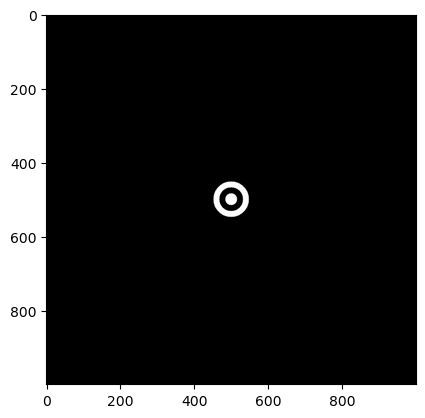

In [8]:
tests = []

# circle
test = np.zeros((1000, 1000))
test = cv.circle(test, (500,500), 16, 255, -1)
tests.append(test)

# trident_1d
test = np.zeros((1000, 1000))
test[:, 492: 508] = 255
test[:, 444: 460] = 255
test[:, 540: 556] = 255
tests.append(test)

# trident_2d
test = np.zeros((1000, 1000))
test = trident_2d([1], 255, 255, (1000, 1000))[0]
tests.append(test)

plt.imshow(test, cmap='gray')

In [9]:
ffted_test = []
for test in tests:
    ffted_test.append(fft.fftshift(fft.fft2(test)))

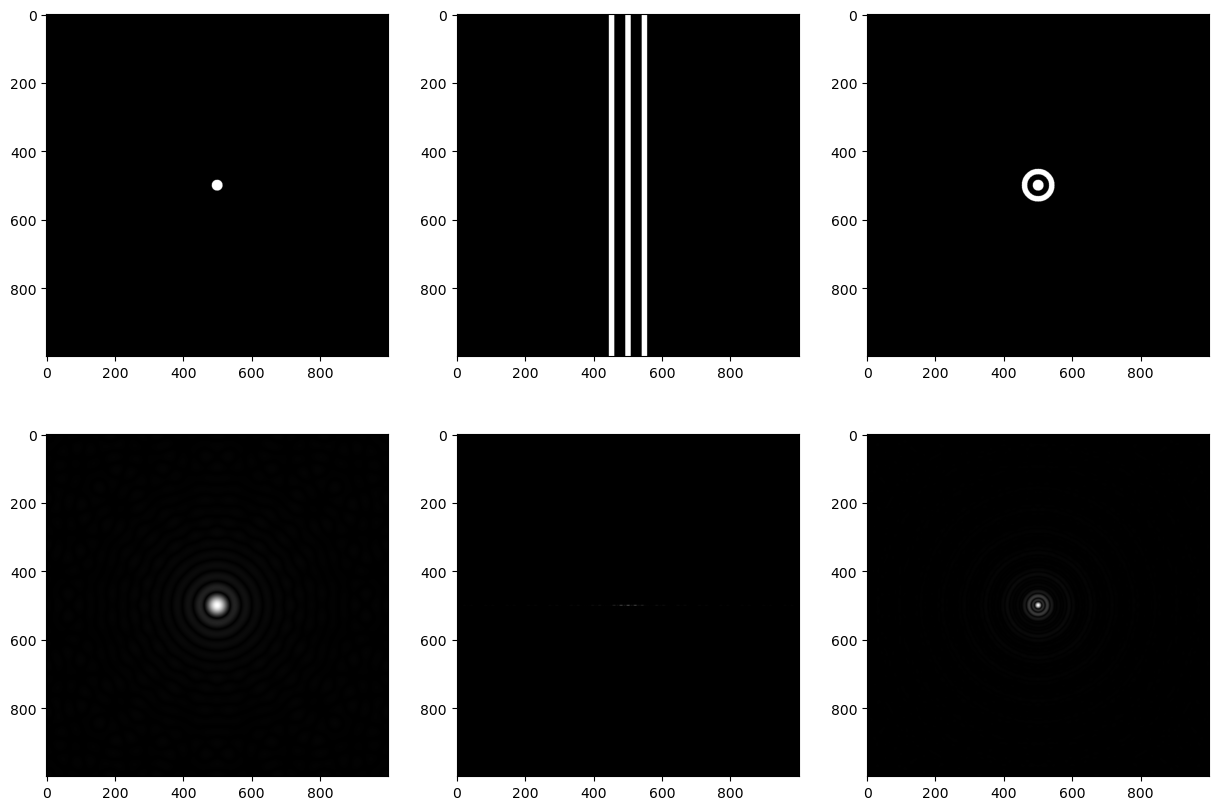

In [14]:
# show the comparisons in 2 * 3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3):
    axs[0, i].imshow(tests[i], cmap='gray')
    axs[1, i].imshow(np.abs(ffted_test[i]), cmap='gray')
plt.show()

In [11]:
ffted_raw = []
for img in raw_2d:
    ffted_raw.append(fft.fftshift(fft.fft2(img)))

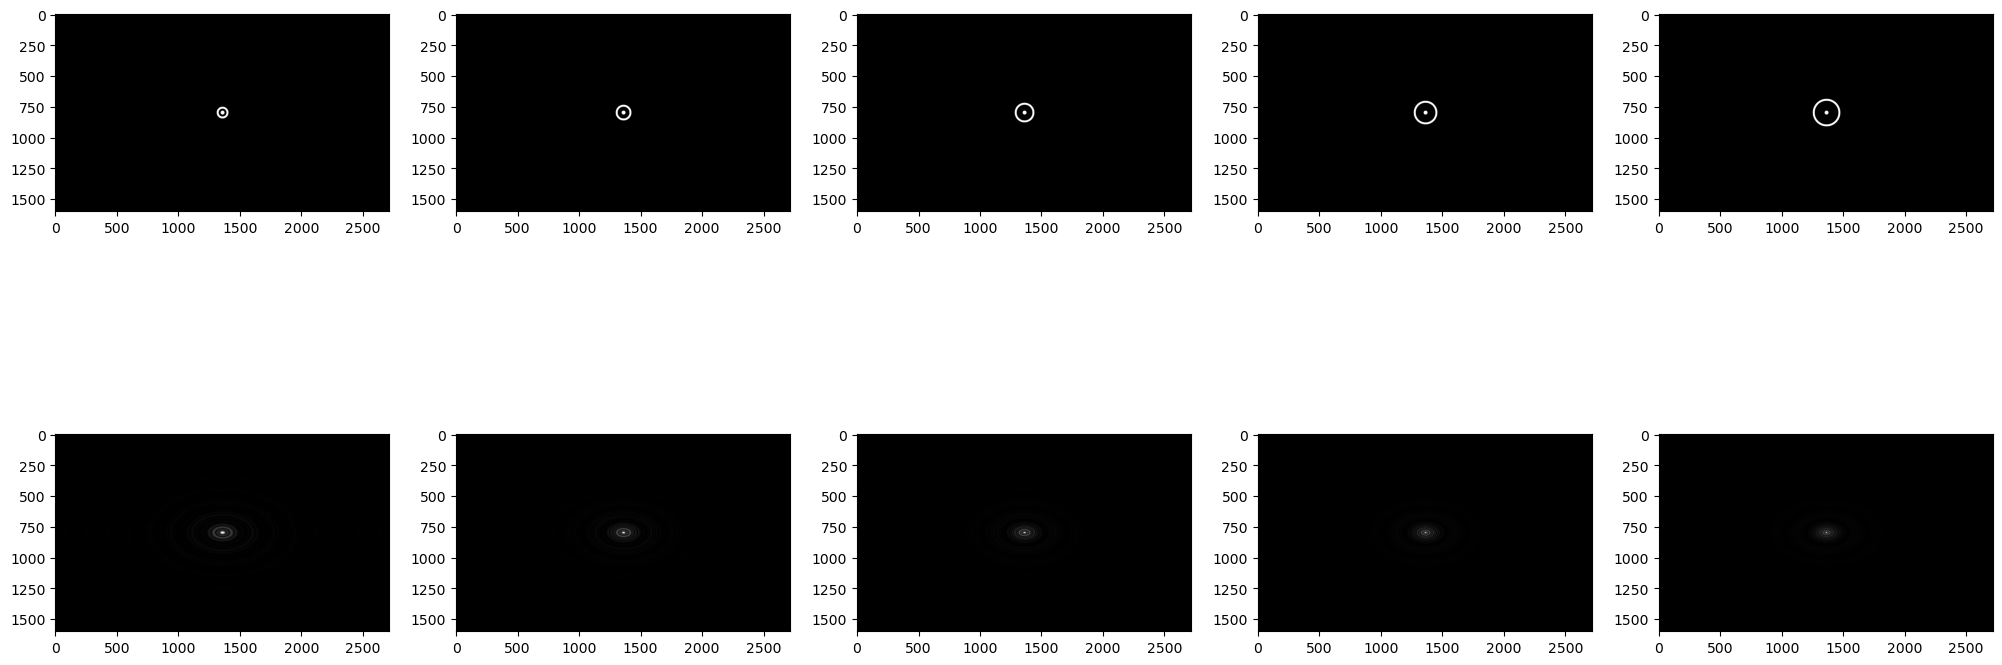

In [12]:
# show the comparisons in 2 * 5 grid
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
for i in range(5):
    axs[0, i].imshow(raw_2d[i], cmap='gray')
    axs[1, i].imshow(np.abs(ffted_raw[i]), cmap='gray')
plt.show()